In [1]:
import keras
import numpy as np
import os

In [2]:
def use_cpu():
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# download dataset

data = np.load("mnist.npz")
train_x = data["x_train"].astype(np.float64)
train_y = data["y_train"]

test_x  = data["x_test"].astype(np.float64)
test_y = data["y_test"]

In [4]:
train_x[0], train_y[0]

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

In [5]:
# normalize input data
train_x /= 255
test_x /= 255

In [6]:
use_cpu()

In [33]:
# create model

model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
# test raw model
result = model.predict(test_x[:10])

In [36]:
np.argmax(result, axis=-1), test_y[:10]

(array([6, 6, 4, 6, 4, 4, 9, 6, 6, 2]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [37]:
# train model

In [38]:
# prepare dataset

In [39]:
import tensorflow as tf

In [40]:
batch_size = 10
epochs = 10
learning_rate = 0.01

In [50]:
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(batch_size)

In [51]:
dataset.shuffle(buffer_size=100)

<ShuffleDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>

In [52]:
# compile model
optimizer = keras.optimizers.adam_v2.Adam(learning_rate)
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

model.compile(loss=loss, optimizer = optimizer, metrics=metrics)

In [53]:
history = model.fit(dataset,batch_size=batch_size, epochs=epochs)

Epoch 1/10
6000/6000 [==============================] - 6s 945us/step - loss: 0.3284 - accuracy: 0.9100
Epoch 2/10
6000/6000 [==============================] - 6s 948us/step - loss: 0.2490 - accuracy: 0.9377
Epoch 3/10
6000/6000 [==============================] - 6s 944us/step - loss: 0.2318 - accuracy: 0.9452
Epoch 4/10
6000/6000 [==============================] - 6s 941us/step - loss: 0.2036 - accuracy: 0.9533
Epoch 5/10
6000/6000 [==============================] - 6s 943us/step - loss: 0.2016 - accuracy: 0.9561
Epoch 6/10
6000/6000 [==============================] - 6s 945us/step - loss: 0.1907 - accuracy: 0.9573
Epoch 7/10
6000/6000 [==============================] - 6s 948us/step - loss: 0.1947 - accuracy: 0.9575
Epoch 8/10
6000/6000 [==============================] - 6s 951us/step - loss: 0.1931 - accuracy: 0.9590
Epoch 9/10
6000/6000 [==============================] - 6s 947us/step - loss: 0.1754 - accuracy: 0.9623
Epoch 10/10
6000/6000 [==============================] - 6s 952u

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

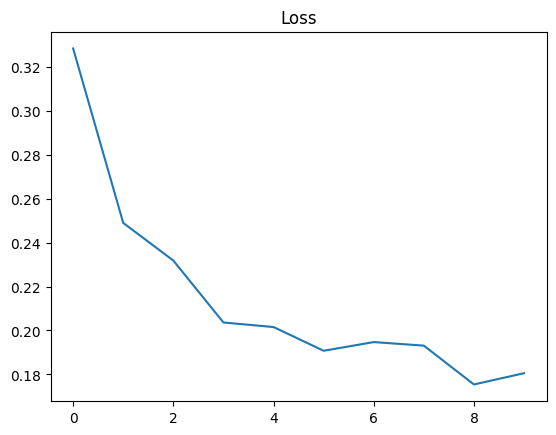

In [69]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
plt.title("Loss")
plt.plot(loss)

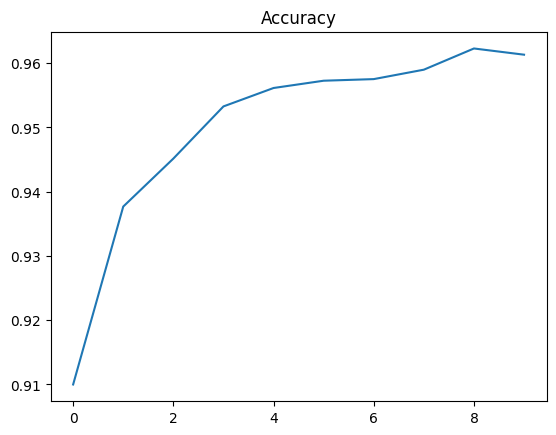

In [70]:
plt.title("Accuracy")
plt.plot(accuracy)

In [71]:
# test current model

In [72]:
result = model.predict(test_x[:10])

In [73]:
np.argmax(result, axis=-1), test_y[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [74]:
score = model.evaluate(test_x, test_y, verbose=0)

In [75]:
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.4365111291408539
Test accuracy:  0.9484999775886536


In [88]:
# conv_model

conv_model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", strides=(1, 1), activation = "relu"),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", strides=(1, 1), activation = "relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", strides=(1, 1), activation = "relu"),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", strides=(1, 1), activation = "relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [89]:
batch_size = 10
epochs = 10
learning_rate = 0.001

In [90]:
train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(batch_size)

In [91]:
dataset.shuffle(buffer_size=100)

<ShuffleDataset shapes: ((None, 28, 28, 1, 1), (None,)), types: (tf.float64, tf.uint8)>

In [92]:
# compile model
optimizer = keras.optimizers.adam_v2.Adam(learning_rate)
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

conv_model.compile(loss=loss, optimizer = optimizer, metrics=metrics)

In [93]:
history = conv_model.fit(dataset,batch_size=batch_size, epochs=epochs)

Epoch 1/10
6000/6000 [==============================] - 191s 32ms/step - loss: 0.1258 - accuracy: 0.9648
Epoch 2/10
6000/6000 [==============================] - 192s 32ms/step - loss: 0.0620 - accuracy: 0.9841
Epoch 3/10
6000/6000 [==============================] - 189s 32ms/step - loss: 0.0465 - accuracy: 0.9890
Epoch 4/10
6000/6000 [==============================] - 189s 31ms/step - loss: 0.0392 - accuracy: 0.9905
Epoch 5/10
6000/6000 [==============================] - 188s 31ms/step - loss: 0.0381 - accuracy: 0.9912
Epoch 6/10
6000/6000 [==============================] - 187s 31ms/step - loss: 0.0307 - accuracy: 0.9930
Epoch 7/10
6000/6000 [==============================] - 190s 32ms/step - loss: 0.0288 - accuracy: 0.9934
Epoch 8/10
6000/6000 [==============================] - 190s 32ms/step - loss: 0.0310 - accuracy: 0.9935
Epoch 9/10
6000/6000 [==============================] - 192s 32ms/step - loss: 0.0249 - accuracy: 0.9944
Epoch 10/10
6000/6000 [==============================] 

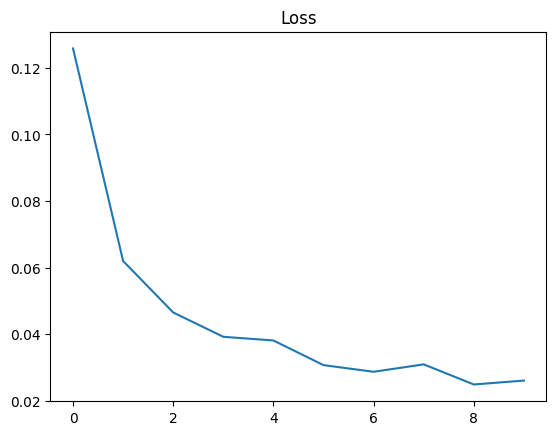

In [94]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
plt.title("Loss")
plt.plot(loss)

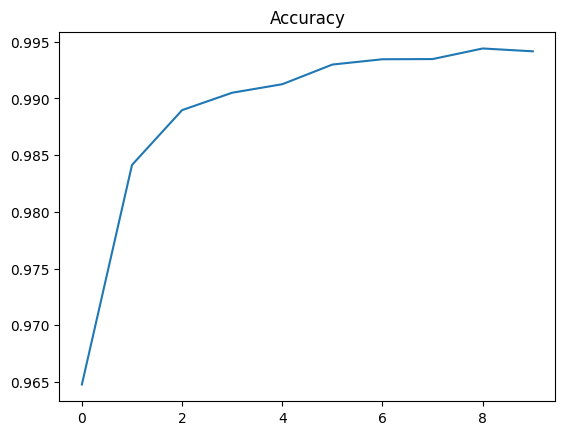

In [95]:
plt.title("Accuracy")
plt.plot(accuracy)

In [96]:
score = conv_model.evaluate(test_x, test_y, verbose=0)

In [97]:
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.059924688190221786
Test accuracy:  0.9890000224113464
